In [2]:
from models.CNN import CNN
from torch.utils.data import DataLoader
from utils.customDataset import CustomDataset
from utils.dataPreprocessing import data_preprocessing
from utils.dataVisualisation import plot_training
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loading Data

In [3]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
X_filenames, t = data_preprocessing(df_data, normalized=False, one_hot=True)
X_train_filenames, X_test_filenames, t_train, t_test = train_test_split(X_filenames, t, test_size=0.3, random_state=0)

In [5]:
img_size = 32

batch_size = 1

dataset_train = CustomDataset('../data/images', filenames=X_train_filenames, targets=t_train, img_size=img_size)
dataset_test = CustomDataset('../data/images', filenames=X_test_filenames, targets=t_test, img_size=img_size)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

## CNN without regularization

In [32]:
model = CNN(num_epochs=100)
model.set_model(output_size=t.shape[1])
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [33]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.61283, Accuracy: 0.72%
Epoch 2/100, Loss: 4.56300, Accuracy: 2.16%
Epoch 3/100, Loss: 4.43511, Accuracy: 3.17%
Epoch 4/100, Loss: 4.23365, Accuracy: 6.49%
Epoch 5/100, Loss: 3.88178, Accuracy: 8.23%
Epoch 6/100, Loss: 3.48634, Accuracy: 16.31%
Epoch 7/100, Loss: 3.15642, Accuracy: 19.91%
Epoch 8/100, Loss: 2.81219, Accuracy: 24.24%
Epoch 9/100, Loss: 2.56717, Accuracy: 27.42%
Epoch 10/100, Loss: 2.35924, Accuracy: 32.90%
Epoch 11/100, Loss: 2.13732, Accuracy: 37.95%
Epoch 12/100, Loss: 2.06741, Accuracy: 38.96%
Epoch 13/100, Loss: 1.82644, Accuracy: 45.89%
Epoch 14/100, Loss: 1.71259, Accuracy: 48.77%
Epoch 15/100, Loss: 1.62899, Accuracy: 50.65%
Epoch 16/100, Loss: 1.49481, Accuracy: 55.12%
Epoch 17/100, Loss: 1.40106, Accuracy: 56.85%
Epoch 18/100, Loss: 1.35464, Accuracy: 57.29%
Epoch 19/100, Loss: 1.22782, Accuracy: 61.33%
Epoch 20/100, Loss: 1.22611, Accuracy: 62.05%
Epoch 21/100, Loss: 1.10364, Accuracy: 65.66%
Epoch 22/100, Loss: 1.05603, Accuracy: 66.09%
Ep

In [34]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 56.90% on test data


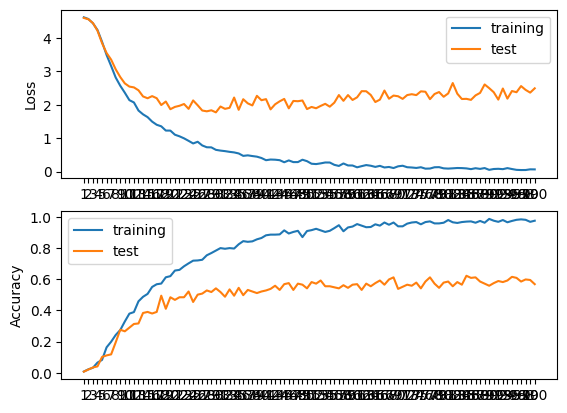

In [35]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## CNN with regularization

In [46]:
model_reg = CNN(num_epochs=100)
model_reg.set_model(output_size=t.shape[1])
model_reg.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)

In [47]:
loss_train, accuracy_train, loss_test, accuracy_test = model_reg.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.62710, Accuracy: 0.72%
Epoch 2/100, Loss: 4.56031, Accuracy: 0.87%
Epoch 3/100, Loss: 4.48097, Accuracy: 2.60%
Epoch 4/100, Loss: 4.29622, Accuracy: 4.47%
Epoch 5/100, Loss: 4.02063, Accuracy: 7.22%
Epoch 6/100, Loss: 3.72910, Accuracy: 12.27%
Epoch 7/100, Loss: 3.41585, Accuracy: 13.13%
Epoch 8/100, Loss: 3.07464, Accuracy: 18.90%
Epoch 9/100, Loss: 2.77715, Accuracy: 28.43%
Epoch 10/100, Loss: 2.59010, Accuracy: 27.85%
Epoch 11/100, Loss: 2.41315, Accuracy: 31.60%
Epoch 12/100, Loss: 2.12957, Accuracy: 36.80%
Epoch 13/100, Loss: 2.00823, Accuracy: 40.40%
Epoch 14/100, Loss: 1.96110, Accuracy: 42.28%
Epoch 15/100, Loss: 1.84848, Accuracy: 44.01%
Epoch 16/100, Loss: 1.66964, Accuracy: 51.23%
Epoch 17/100, Loss: 1.52953, Accuracy: 54.98%
Epoch 18/100, Loss: 1.50934, Accuracy: 53.68%
Epoch 19/100, Loss: 1.39215, Accuracy: 59.60%
Epoch 20/100, Loss: 1.25638, Accuracy: 60.89%
Epoch 21/100, Loss: 1.25133, Accuracy: 62.48%
Epoch 22/100, Loss: 1.10602, Accuracy: 67.10%
Ep

In [48]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 50.51% on test data


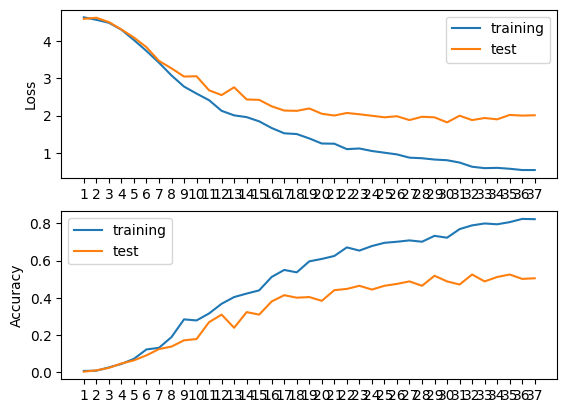

In [50]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## CNN with PReLU function

In [40]:
model = CNN(num_epochs=100)
model.set_model(output_size=t.shape[1], activation_function='prelu')
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [41]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.61563, Accuracy: 1.44%
Epoch 2/100, Loss: 4.55934, Accuracy: 3.03%
Epoch 3/100, Loss: 4.40506, Accuracy: 5.92%
Epoch 4/100, Loss: 3.94467, Accuracy: 9.38%
Epoch 5/100, Loss: 3.22732, Accuracy: 20.06%
Epoch 6/100, Loss: 2.67225, Accuracy: 28.72%
Epoch 7/100, Loss: 2.22728, Accuracy: 37.95%
Epoch 8/100, Loss: 1.92035, Accuracy: 43.87%
Epoch 9/100, Loss: 1.65879, Accuracy: 51.08%
Epoch 10/100, Loss: 1.42526, Accuracy: 57.14%
Epoch 11/100, Loss: 1.18221, Accuracy: 63.35%
Epoch 12/100, Loss: 1.17725, Accuracy: 64.07%
Epoch 13/100, Loss: 1.05402, Accuracy: 68.25%
Epoch 14/100, Loss: 0.89732, Accuracy: 74.31%
Epoch 15/100, Loss: 0.80833, Accuracy: 75.90%
Epoch 16/100, Loss: 0.73557, Accuracy: 76.48%
Epoch 17/100, Loss: 0.67784, Accuracy: 77.34%
Epoch 18/100, Loss: 0.60773, Accuracy: 80.95%
Epoch 19/100, Loss: 0.55789, Accuracy: 81.24%
Epoch 20/100, Loss: 0.49528, Accuracy: 85.57%
Epoch 21/100, Loss: 0.45203, Accuracy: 85.43%
Epoch 22/100, Loss: 0.48517, Accuracy: 84.42%
E

In [42]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 57.91% on test data


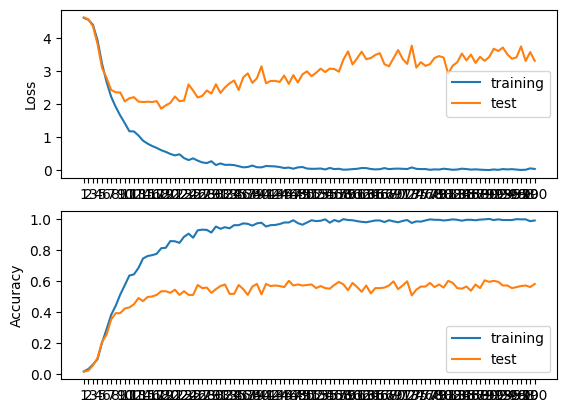

In [43]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## K-fold cross-validation

In [14]:
model = CNN(num_epochs=100)
model.set_model(output_size=t.shape[1])
best_params, accuracy_historic = model.k_fold_cross_validation(X_train_filenames, t_train, img_size=img_size)

testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.388
K = 1, accuracy: 0.000
K = 2, accuracy: 0.353
K = 3, accuracy: 0.428
K = 4, accuracy: 0.341
Best val accuracy: 0.302 | lr: 1e-04 | l2_reg: 1e-07
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.374
K = 1, accuracy: 0.338
K = 2, accuracy: 0.273
K = 3, accuracy: 0.007
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.022
K = 1, accuracy: 0.302
K = 2, accuracy: 0.360
K = 3, accuracy: 0.014
K = 4, accuracy: 0.014
testing parameters: learning_rate = 1e-04,    regularization = 1e-04
K = 0, accuracy: 0.014
K = 1, accuracy: 0.022
K = 2, accuracy: 0.022
K = 3, accuracy: 0.268
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-03
K = 0, accuracy: 0.288
K = 1, accuracy: 0.331
K = 2, accuracy: 0.374
K = 3, accuracy: 0.391
K = 4, accuracy: 0.348
Best val accuracy: 0.346 | 

[Text(0.5, 23.52222222222222, 'weight decay'),
 Text(50.722222222222214, 0.5, 'learning rate')]

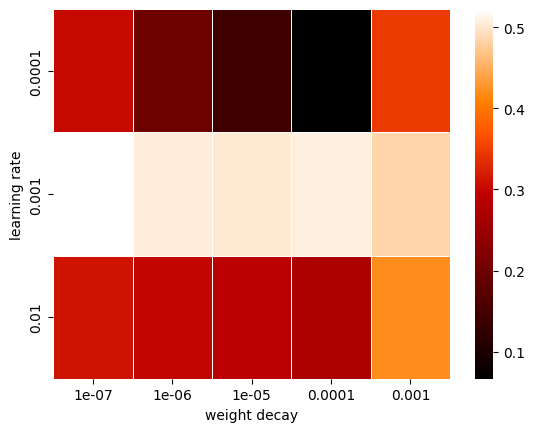

In [26]:
ax = sns.heatmap(accuracy_historic, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3],     
                 yticklabels=[1e-4, 1e-3, 1e-2])
ax.set(xlabel="weight decay", ylabel='learning rate')

In [17]:
best_params

(0.001, 1e-07)

In [51]:
model = CNN(num_epochs=100)
model.set_model(output_size=t.shape[1], activation_function='relu')
model.set_optimizer(optim='SGD', lr=best_params[0], reg=best_params[1])

In [52]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.61244, Accuracy: 1.01%
Epoch 2/100, Loss: 4.56007, Accuracy: 2.74%
Epoch 3/100, Loss: 4.48128, Accuracy: 1.88%
Epoch 4/100, Loss: 4.28195, Accuracy: 4.33%
Epoch 5/100, Loss: 4.02555, Accuracy: 7.36%
Epoch 6/100, Loss: 3.66320, Accuracy: 11.26%
Epoch 7/100, Loss: 3.29954, Accuracy: 18.18%
Epoch 8/100, Loss: 3.01371, Accuracy: 19.05%
Epoch 9/100, Loss: 2.66423, Accuracy: 26.55%
Epoch 10/100, Loss: 2.50929, Accuracy: 30.01%
Epoch 11/100, Loss: 2.21844, Accuracy: 37.23%
Epoch 12/100, Loss: 2.03841, Accuracy: 40.55%
Epoch 13/100, Loss: 1.92330, Accuracy: 43.72%
Epoch 14/100, Loss: 1.81204, Accuracy: 45.45%
Epoch 15/100, Loss: 1.74289, Accuracy: 47.91%
Epoch 16/100, Loss: 1.62271, Accuracy: 51.66%
Epoch 17/100, Loss: 1.53156, Accuracy: 52.81%
Epoch 18/100, Loss: 1.39890, Accuracy: 56.85%
Epoch 19/100, Loss: 1.32651, Accuracy: 56.71%
Epoch 20/100, Loss: 1.23548, Accuracy: 60.17%
Epoch 21/100, Loss: 1.17890, Accuracy: 62.91%
Epoch 22/100, Loss: 1.12896, Accuracy: 63.64%
Ep

In [53]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 55.89% on test data


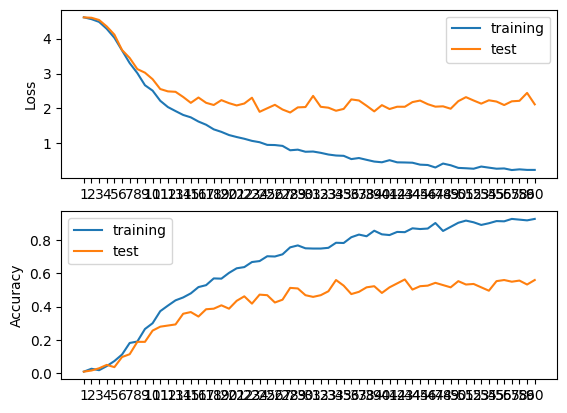

In [54]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')